Aperçu des données :
            ID                                               Text      Label
0  ID_AASHwXxg   Mwangonde: Khansala wachinyamata Akamati achi...   POLITICS
1  ID_AGoFySzn   MCP siidakhutire ndi kalembera Chipani cha Ma...   POLITICS
2  ID_AGrrkBGP  Bungwe la MANEPO Lapempha Boma Liganizire Anth...     HEALTH
3  ID_AIJeigeG   Ndale zogawanitsa miyambo zanyanya Si zachile...   POLITICS
4  ID_APMprMbV   Nanga wapolisi ataphofomoka? Masiku ano sichi...  LAW/ORDER

Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1436 non-null   object
 1   Text    1436 non-null   object
 2   Label   1436 non-null   object
dtypes: object(3)
memory usage: 33.8+ KB
None

Statistiques des labels :
Label
POLITICS                279
SOCIAL                  152
RELIGION                147
LAW/ORDER               136
SOCIAL I

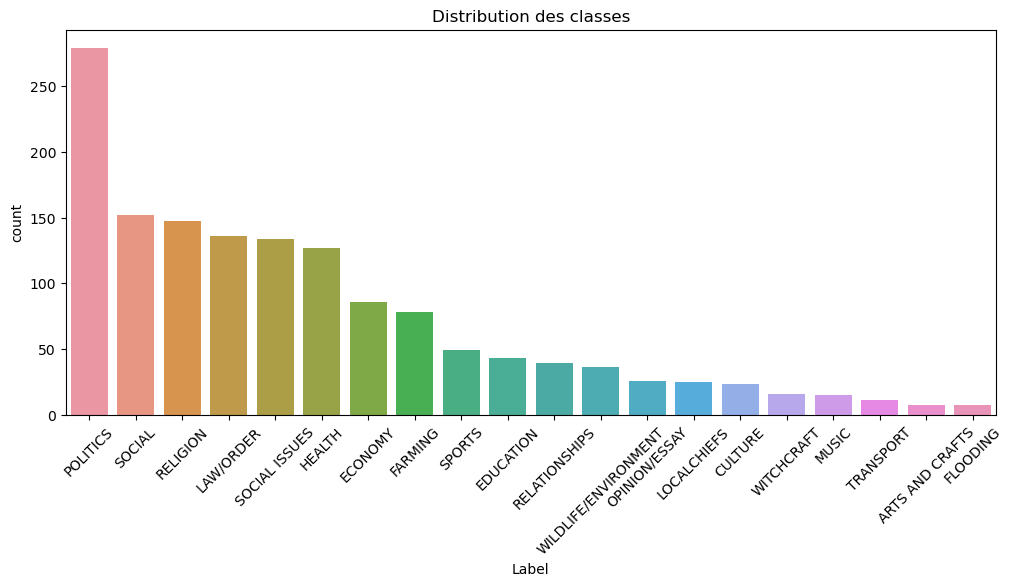

Avant SMOTE : [  6  18  69  34  62   6 102 109  20  12  21 223  31 117 121 107  39   9
  29  13]
Après SMOTE : [223 223 223 223 223 223 223 223 223 223 223 223 223 223 223 223 223 223
 223 223]

🔹 Entraînement du modèle : Naive Bayes
✅ Accuracy: 0.6111
                      precision    recall  f1-score   support

     ARTS AND CRAFTS       0.00      0.00      0.00         1
             CULTURE       0.29      0.40      0.33         5
             ECONOMY       0.38      0.18      0.24        17
           EDUCATION       0.54      0.78      0.64         9
             FARMING       0.84      1.00      0.91        16
            FLOODING       0.11      1.00      0.20         1
              HEALTH       0.79      0.92      0.85        25
           LAW/ORDER       0.80      0.59      0.68        27
         LOCALCHIEFS       0.33      0.60      0.43         5
               MUSIC       0.60      1.00      0.75         3
       OPINION/ESSAY       0.00      0.00      0.00         5
  

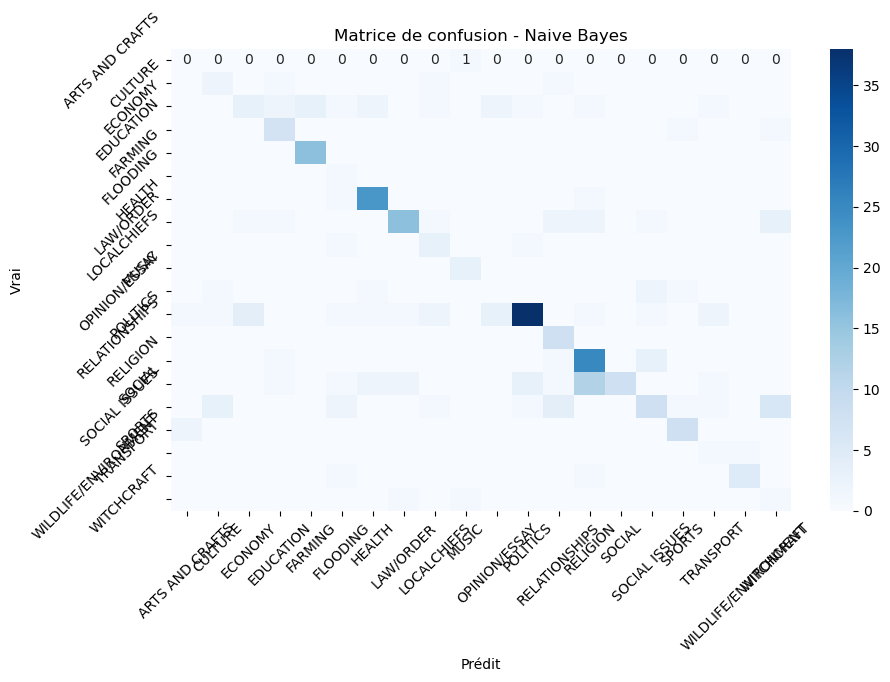


🔹 Entraînement du modèle : Logistic Regression
✅ Accuracy: 0.6875
                      precision    recall  f1-score   support

     ARTS AND CRAFTS       0.00      0.00      0.00         1
             CULTURE       0.40      0.40      0.40         5
             ECONOMY       0.37      0.41      0.39        17
           EDUCATION       0.88      0.78      0.82         9
             FARMING       0.88      0.94      0.91        16
            FLOODING       1.00      1.00      1.00         1
              HEALTH       0.73      0.96      0.83        25
           LAW/ORDER       0.77      0.74      0.75        27
         LOCALCHIEFS       0.57      0.80      0.67         5
               MUSIC       0.75      1.00      0.86         3
       OPINION/ESSAY       0.00      0.00      0.00         5
            POLITICS       0.85      0.71      0.78        56
       RELATIONSHIPS       0.75      0.75      0.75         8
            RELIGION       0.74      0.77      0.75        30
  

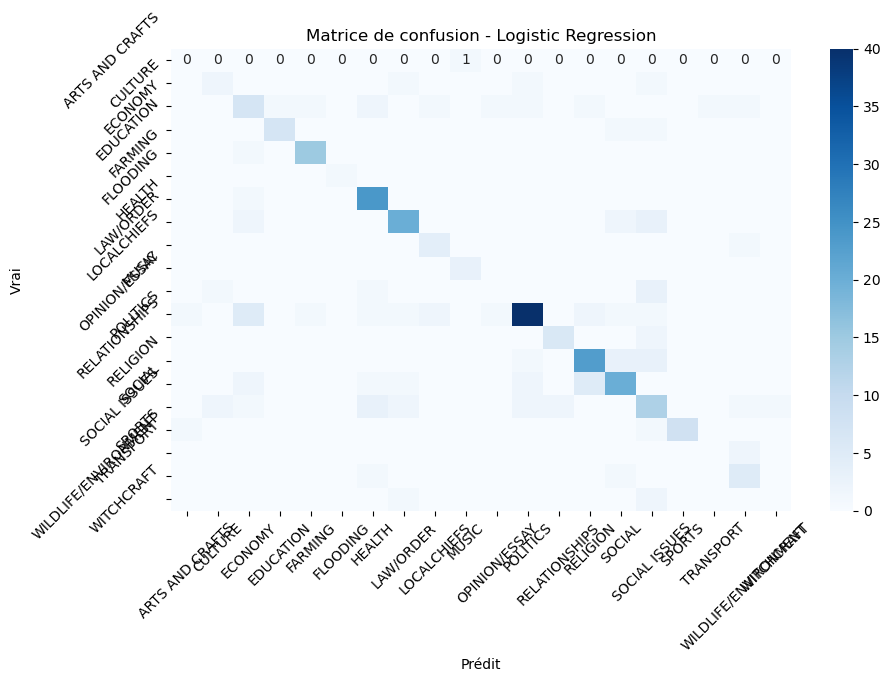


🏆 Le meilleur modèle est : Logistic Regression avec une accuracy de 0.6875
✅ Meilleur modèle sauvegardé avec succès.
✅ Fichier Test_predictions.csv généré.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import joblib

# Modèles rapides et efficaces
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression

# --- Chargement des données ---
df = pd.read_csv("Train.csv")

# --- Exploration des données ---
print("Aperçu des données :")
print(df.head())
print("\nInformations sur les données :")
print(df.info())
print("\nStatistiques des labels :")
print(df['Label'].value_counts())

# Visualisation du déséquilibre des classes
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Label', order=df['Label'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution des classes")
plt.show()

# --- Encodage des labels ---
le = LabelEncoder()
y = le.fit_transform(df['Label'])

# --- Nettoyage et TF-IDF ---
stop_words = ['na', 'ya', 'ni', 'kwa', 'wa']  # adapter selon la langue
tfidf = TfidfVectorizer(max_features=5000, stop_words=stop_words, ngram_range=(1,2))
X = tfidf.fit_transform(df['Text'])

# --- Split train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Gestion du déséquilibre avec SMOTE ---
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Avant SMOTE :", np.bincount(y_train))
print("Après SMOTE :", np.bincount(y_train_res))

# --- Définition des modèles ---
models = {
    "Naive Bayes": ComplementNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1)
}

# --- Entraînement et sélection du meilleur modèle ---
best_model = None
best_accuracy = 0
best_model_name = ""

for name, model in models.items():
    print(f"\n🔹 Entraînement du modèle : {name}")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
    plt.title(f"Matrice de confusion - {name}")
    plt.ylabel("Vrai")
    plt.xlabel("Prédit")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

print(f"\n🏆 Le meilleur modèle est : {best_model_name} avec une accuracy de {best_accuracy:.4f}")

# --- Sauvegarde du meilleur modèle + TF-IDF + LabelEncoder ---
joblib.dump(best_model, "best_model.pkl")
joblib.dump(tfidf, "tfidf.pkl")
joblib.dump(le, "label_encoder.pkl")
print("✅ Meilleur modèle sauvegardé avec succès.")

# --- Exemple de prédiction sur Test.csv ---
test_df = pd.read_csv("Test.csv")
loaded_model = joblib.load("best_model.pkl")
loaded_tfidf = joblib.load("tfidf.pkl")
loaded_le = joblib.load("label_encoder.pkl")

X_test_final = loaded_tfidf.transform(test_df['Text'])
y_pred_final = loaded_model.predict(X_test_final)
test_df["Predicted_Label"] = loaded_le.inverse_transform(y_pred_final)

test_df.to_csv("Test_predictions.csv", index=False)
print("✅ Fichier Test_predictions.csv généré.")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Aperçu des données :


,ID,Text,Label
0,ID_AASHwXxg,Mwangonde: Khansala wachinyamata Akamati achi...,POLITICS
1,ID_AGoFySzn,MCP siidakhutire ndi kalembera Chipani cha Ma...,POLITICS
2,ID_AGrrkBGP,Bungwe la MANEPO Lapempha Boma Liganizire Anth...,HEALTH
3,ID_AIJeigeG,Ndale zogawanitsa miyambo zanyanya Si zachile...,POLITICS
4,ID_APMprMbV,Nanga wapolisi ataphofomoka? Masiku ano sichi...,LAW/ORDER



Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1436 non-null   object
 1   Text    1436 non-null   object
 2   Label   1436 non-null   object
dtypes: object(3)
memory usage: 33.8+ KB
None

=== VALEURS MANQUANTES - TRAIN ===
ID       0
Text     0
Label    0
dtype: int64

Statistiques des labels :
Label
POLITICS                279
SOCIAL                  152
RELIGION                147
LAW/ORDER               136
SOCIAL ISSUES           134
HEALTH                  127
ECONOMY                  86
FARMING                  78
SPORTS                   49
EDUCATION                43
RELATIONSHIPS            39
WILDLIFE/ENVIRONMENT     36
OPINION/ESSAY            26
LOCALCHIEFS              25
CULTURE                  23
WITCHCRAFT               16
MUSIC                    15
TRANSPORT                11
ARTS AND CRAFTS  

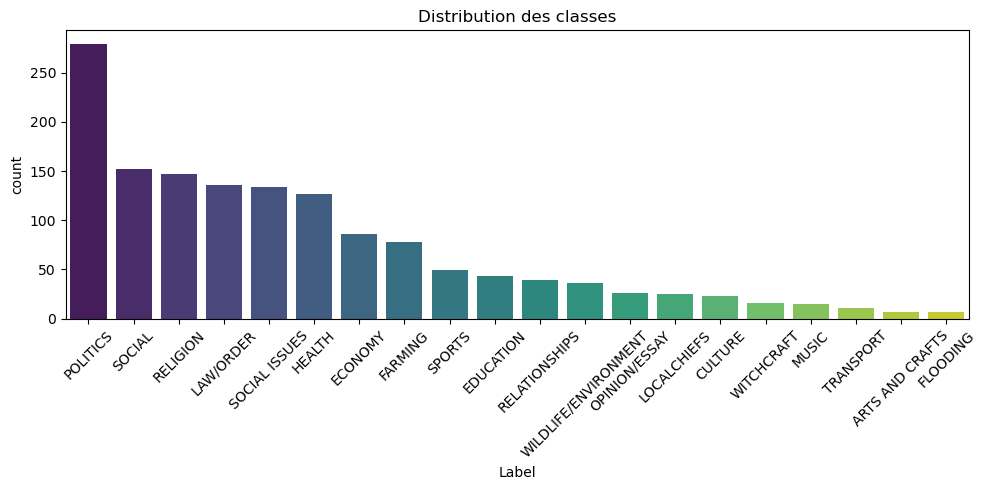

In [4]:

# -------------------------------
# --- 1. Chargement des données ---
# -------------------------------
df = pd.read_csv("Train.csv")

# --- Exploration des données ---
print("Aperçu des données :")
display(df.head())
print("\nInformations sur les données :")
print(df.info())
print("\n=== VALEURS MANQUANTES - TRAIN ===")
print(df.isnull().sum())
print("\nStatistiques des labels :")
print(df['Label'].value_counts())

# Visualisation du déséquilibre des classes
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Label', order=df['Label'].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution des classes")
plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# -------------------------------
# --- 2. Encodage des labels ---
# -------------------------------
le = LabelEncoder()
y = le.fit_transform(df['Label'])

# -------------------------------
# --- 3. Nettoyage et TF-IDF ---
# -------------------------------
stop_words = chichewa_stopwords = ["ine", "iwe", "iye", "ife", "inu", "iwo","wanga", "wako", "wake", "wathu", "wanu", "wawo",
"uyu", "uyo", "awa", "aja", "ili", "ilo", "izi", "izo","a", "wa", "la", "za", "ya", "cha", "pa",
"ndi", "ndipo", "komanso", "kapena", "chifukwa", "ngakhale","pa", "mu", "ku", "mwa", "ndi", "pansi", "pamwambapa","tsopano", "pamenepa", "pano", "mmene", "momwe",
"kuti", "osati", "chabe", "ena", "onse", "ina", "yense"
]  
tfidf = TfidfVectorizer(max_features=5000, stop_words=stop_words, ngram_range=(1,2))
X = tfidf.fit_transform(df['Text'])

# -------------------------------
# --- 4. Split train/test ---
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# --- 5. Gestion du déséquilibre ---
# -------------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Avant SMOTE :", np.bincount(y_train))
print("Après SMOTE :", np.bincount(y_train_res))


Avant SMOTE : [  6  18  69  34  62   6 102 109  20  12  21 223  31 117 121 107  39   9
  29  13]
Après SMOTE : [223 223 223 223 223 223 223 223 223 223 223 223 223 223 223 223 223 223
 223 223]



 Entraînement du modèle : Naive Bayes
 Accuracy: 0.6007
                      precision    recall  f1-score   support

     ARTS AND CRAFTS       0.00      0.00      0.00         1
             CULTURE       0.33      0.40      0.36         5
             ECONOMY       0.50      0.24      0.32        17
           EDUCATION       0.58      0.78      0.67         9
             FARMING       0.84      1.00      0.91        16
            FLOODING       0.10      1.00      0.18         1
              HEALTH       0.82      0.92      0.87        25
           LAW/ORDER       0.80      0.59      0.68        27
         LOCALCHIEFS       0.33      0.60      0.43         5
               MUSIC       0.60      1.00      0.75         3
       OPINION/ESSAY       0.00      0.00      0.00         5
            POLITICS       0.84      0.66      0.74        56
       RELATIONSHIPS       0.42      1.00      0.59         8
            RELIGION       0.59      0.87      0.70        30
            

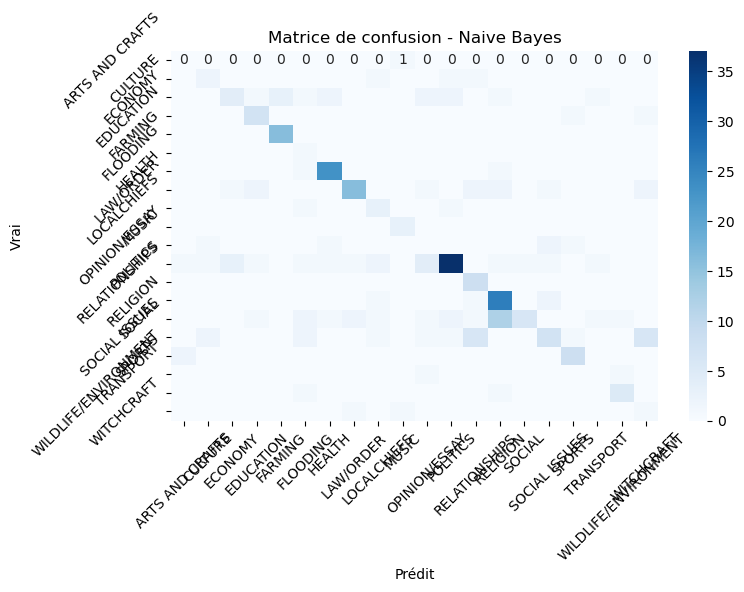


 Entraînement du modèle : Logistic Regression
 Accuracy: 0.6910
                      precision    recall  f1-score   support

     ARTS AND CRAFTS       0.00      0.00      0.00         1
             CULTURE       0.40      0.40      0.40         5
             ECONOMY       0.36      0.29      0.32        17
           EDUCATION       0.86      0.67      0.75         9
             FARMING       0.83      0.94      0.88        16
            FLOODING       0.33      1.00      0.50         1
              HEALTH       0.75      0.96      0.84        25
           LAW/ORDER       0.78      0.78      0.78        27
         LOCALCHIEFS       0.67      0.80      0.73         5
               MUSIC       0.75      1.00      0.86         3
       OPINION/ESSAY       0.00      0.00      0.00         5
            POLITICS       0.81      0.68      0.74        56
       RELATIONSHIPS       0.80      1.00      0.89         8
            RELIGION       0.77      0.77      0.77        30
    

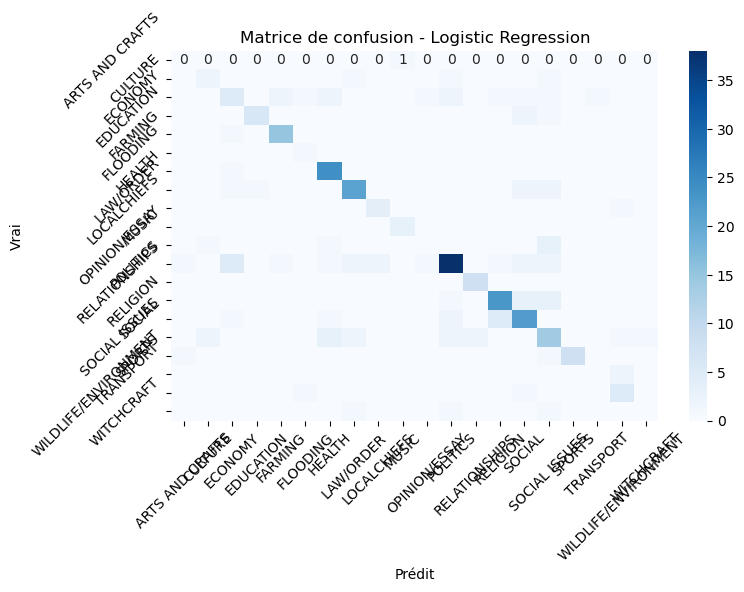


 Le meilleur modèle est : Logistic Regression avec une accuracy de 0.6910


In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
# -------------------------------
# --- 6. Définition des modèles ---
# -------------------------------
models = {
    "Naive Bayes": ComplementNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1)
}

# -------------------------------
# --- 7. Entraînement & Évaluation ---
# -------------------------------
best_model = None
best_accuracy = 0
best_model_name = ""

for name, model in models.items():
    print(f"\n Entraînement du modèle : {name}")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Matrice de confusion optimisée
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Matrice de confusion - {name}")
    plt.ylabel("Vrai")
    plt.xlabel("Prédit")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Sélection du meilleur modèle
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

print(f"\n Le meilleur modèle est : {best_model_name} avec une accuracy de {best_accuracy:.4f}")


In [14]:
# -------------------------------
# --- 8. Sauvegarde du modèle ---
# -------------------------------
joblib.dump(best_model, "best_model.pkl")
joblib.dump(tfidf, "tfidf.pkl")
joblib.dump(le, "label_encoder.pkl")
print(" Meilleur modèle sauvegardé avec succès.")

# -------------------------------
# --- 9. Prédiction sur Test.csv ---
# -------------------------------
test_df = pd.read_csv("Test.csv")
loaded_model = joblib.load("best_model.pkl")
loaded_tfidf = joblib.load("tfidf.pkl")
loaded_le = joblib.load("label_encoder.pkl")

X_test_final = loaded_tfidf.transform(test_df['Text'])
y_pred_final = loaded_model.predict(X_test_final)
test_df["Predicted_Label"] = loaded_le.inverse_transform(y_pred_final)

test_df.to_csv("Test_predictions.csv", index=False)
print(" Fichier Test_predictions.csv généré.")

 Meilleur modèle sauvegardé avec succès.
 Fichier Test_predictions.csv généré.
